Accuracy: 0.6628489620615605


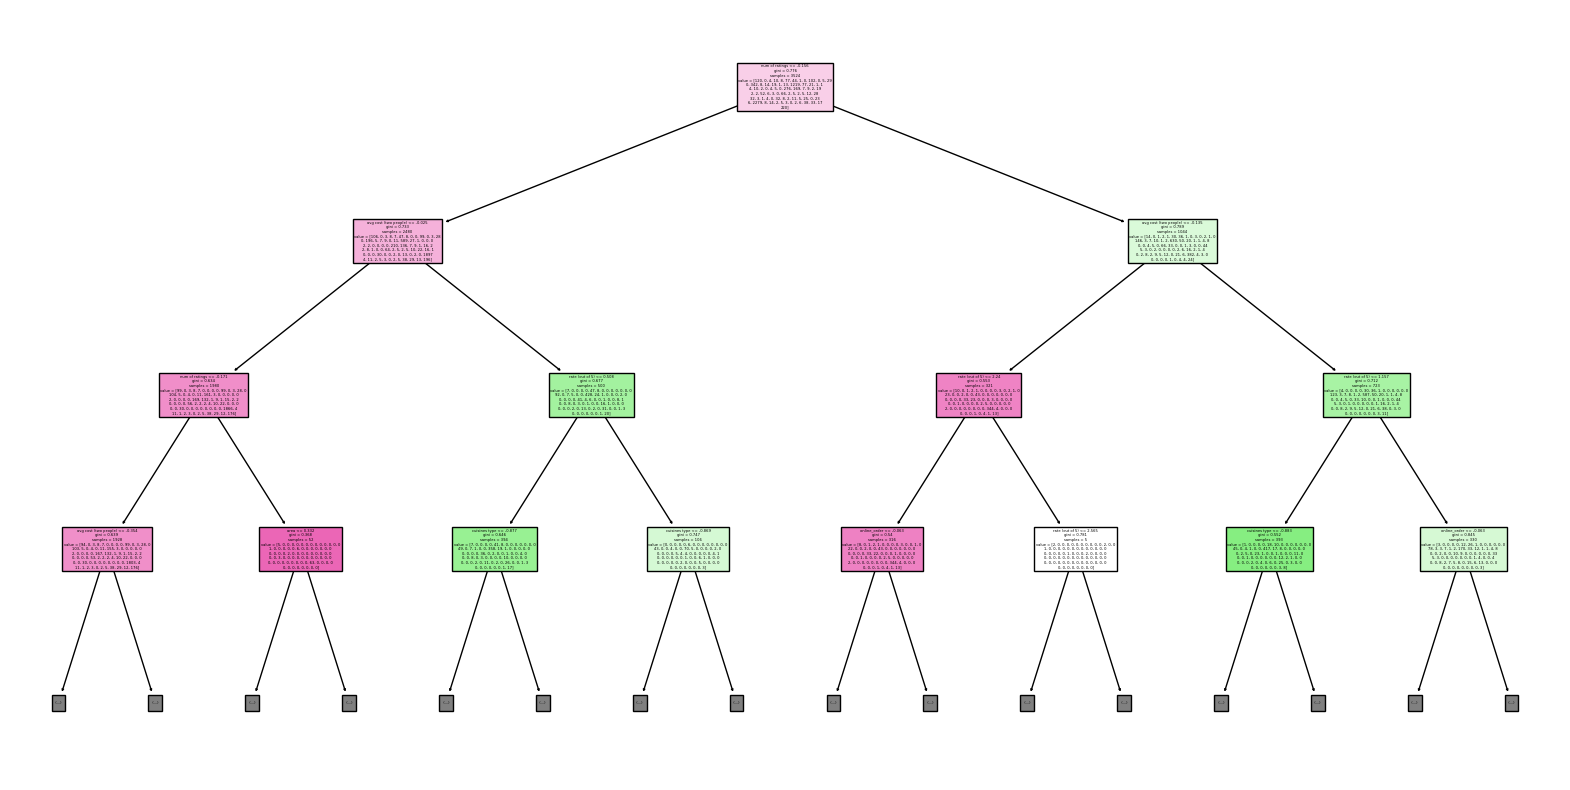

In [8]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('zomato.csv')

df = df.dropna()

label_encoders = {}
for column in ['restaurant name', 'restaurant type', 'online_order', 'table booking', 'cuisines type', 'area']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df[['rate (out of 5)', 'num of ratings', 'avg cost (two people)', 'online_order', 'table booking', 'cuisines type', 'area']].values
y = df['restaurant type'].values  # Assuming 'restaurant type' is the target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=60)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

clf = RandomForestClassifier(n_estimators=100, random_state=60)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

plt.figure(figsize=(20, 10))
plot_tree(clf.estimators_[0], feature_names=['rate (out of 5)', 'num of ratings', 'avg cost (two people)', 'online_order', 'table booking', 'cuisines type', 'area'], max_depth=3, filled=True)
plt.show()